In [0]:
import sys
import gym
import numpy as np
from collections import defaultdict

from plot_util import plot_blackjack_values,plot_policy

In [0]:
env=gym.make('Blackjack-v0')

In [0]:
print(env.observation_space)
print(env.action_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


In [0]:
for i_episode in range(3):
  state=env.reset()
  while True:
    print(state)
    action=env.action_space.sample()
    state,reward,done,info=env.step(action)
    if done:
      print('End Game! Reward: ',reward)
      print('You won :) \n') if reward>0 else print('You lost:( \n')
      break

(20, 10, False)
End Game! Reward:  -1.0
You lost:( 

(15, 10, False)
(20, 10, False)
End Game! Reward:  -1
You lost:( 

(15, 4, False)
End Game! Reward:  1.0
You won :) 



##Monte Carlo Prediction


In [0]:
def generate_episode_from_limit_stochastic(env):
  episode=[]
  state=env.reset()
  while True:
    probs=[0.8, 0.2] if state[0]>18 else [0.2, 0.8]
    action=np.random.choice(np.arange(2),p=probs)
    next_state,reward,done,info=env.step(action)
    episode.append((state,action,reward))
    state=next_state
    if done:
      break
  return episode

In [0]:
for i in range(3):
  print(generate_episode_from_limit_stochastic(env))

[((15, 5, False), 1, 0), ((20, 5, False), 0, -1.0)]
[((20, 10, False), 1, -1)]
[((12, 10, True), 0, 1.0)]


In [0]:
def mc_prediction_q(env,num_episodes,generate_episode,gamma=1.0):
  returns_sum=defaultdict(lambda: np.zeros(env.action_space.n))
  N=defaultdict(lambda: np.zeros(env.action_space.n))
  Q=defaultdict(lambda: np.zeros(env.action_space.n))

  for i_episode in range(num_episodes):
    episode=generate_episode_from_limit_stochastic(env)
    states,actions,rewards=zip(*episode)
    discounts = np.array([gamma**i for i in range(len(rewards)+1)])
    for i,state in enumerate(states):
      returns_sum[state][actions[i]]+=sum(rewards[i:]*discounts[:-(1+i)])
      N[state][actions[i]]+=1.0
      Q[state][actions[i]]=returns_sum[state][actions[i]]/N[state][actions[i]]
  return Q

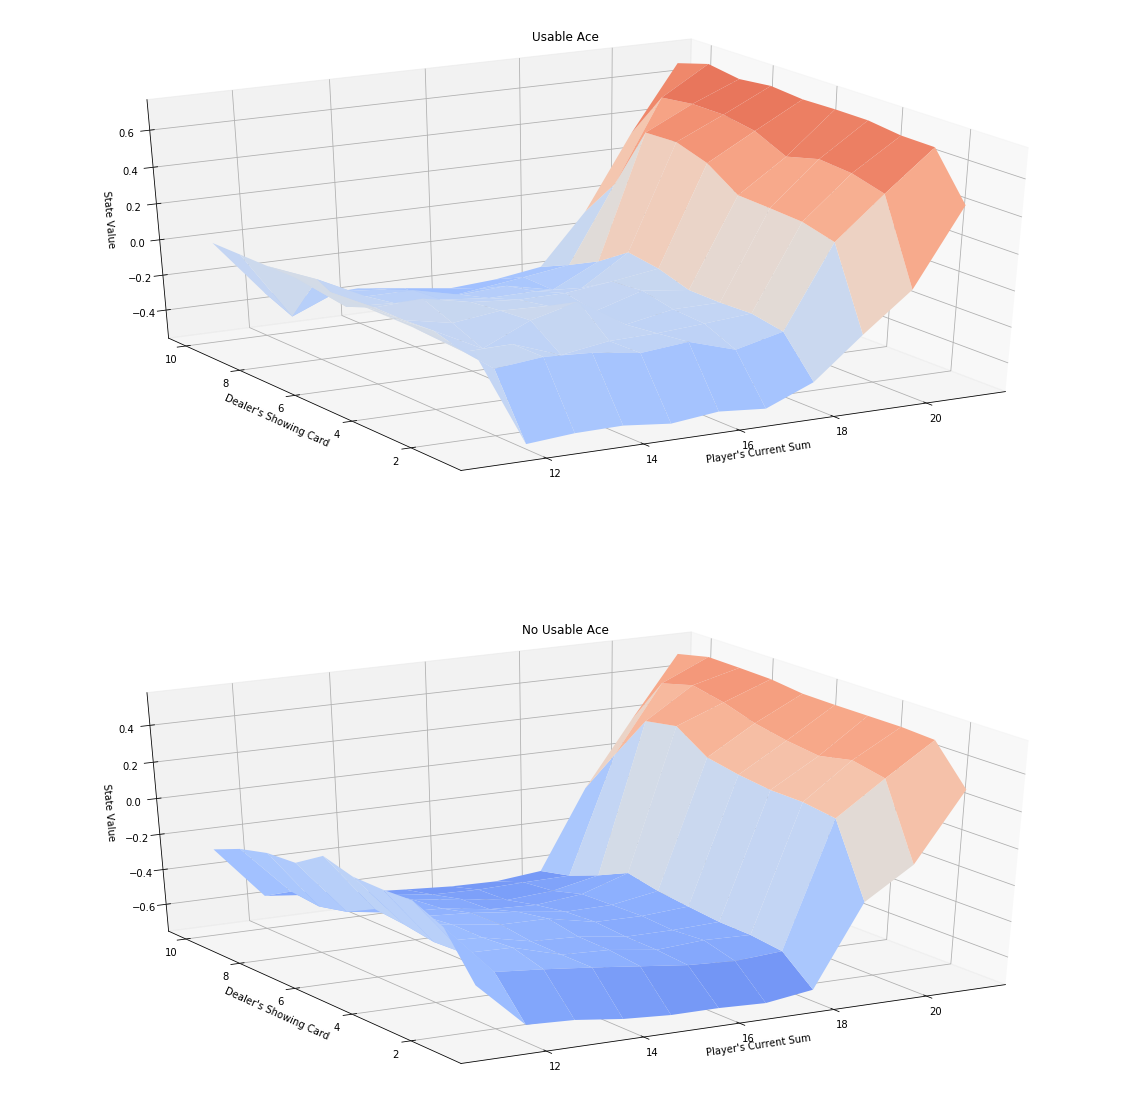

In [0]:
# obtain the action-value function
Q = mc_prediction_q(env, 500000, generate_episode_from_limit_stochastic)

# obtain the corresponding state-value function
V_to_plot = dict((k,(k[0]>18)*(np.dot([0.8, 0.2],v)) + (k[0]<=18)*(np.dot([0.2, 0.8],v))) \
         for k, v in Q.items())

# plot the state-value function
plot_blackjack_values(V_to_plot)